In [1]:
import pandas as pd                             # Added to manipulate data and analyze it
import numpy as np                              # Used for numerical computations
import matplotlib.pyplot as plt                 # Used to visualize data
import seaborn as sns                           # Used to visualize data

from sklearn.preprocessing import LabelEncoder    # Used for label Encoding of categorical variables
from sklearn.preprocessing import MinMaxScaler    # Feauture Scaling for Normalization
from sklearn.preprocessing import StandardScaler  # Feature Scaling for Standardization

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
#Load the data
songs_data = pd.read_csv(r"..\data\songs_data.csv", index_col=0)

In [5]:
#Basic Information
print("Displaying first five rows:")
songs_data.head()

Displaying first five rows:


track_name   track_artist  \
track_id                                                              
6ho0GyrWZN3mhi9zVRW7xi                     Losing It         FISHER   
4bYJKHG6KLdGzHQRJMaFc8        Rock And Roll All Nite           KISS   
1VGlMYqPO1LHyclvfIMvWI  Snälla bli min (Hjalm Remix)  Robin Lukovic   
6BbINUfGabVyiNFJpQXn3x                        Wicked         Future   
1Ly0ssAgeM7YqdHptao8Oe                      Paranoid  Black Sabbath   

                        track_popularity genre  danceability  energy  key  \
track_id                                                                    
6ho0GyrWZN3mhi9zVRW7xi                79   edm         0.760   0.964    2   
4bYJKHG6KLdGzHQRJMaFc8                 3  rock         0.581   0.831    1   
1VGlMYqPO1LHyclvfIMvWI                 0   edm         0.661   0.760    8   
6BbINUfGabVyiNFJpQXn3x                62   rap         0.718   0.679   11   
1Ly0ssAgeM7YqdHptao8Oe                15  rock         0.426   0.619    4   

                        loudness  mode  speechiness  acousticness  \
track_id                                                            
6ho0GyrWZN3mhi9zVRW7xi    -5.844     1       0.0576      0.001820   
4bYJKHG6KLdGzHQRJMaFc8    -8.045     1       0.1070      0.045800   
1VGlMYqPO1LHyclvfIMvWI    -4.769     1       0.0268      0.000406   
6BbINUfGabVyiNFJpQXn3x    -5.899     0       0.0706      0.001910   
1Ly0ssAgeM7YqdHptao8Oe   -11.501     0       0.0722      0.000084   

                        instrumentalness  liveness  valence    tempo  \
track_id                                                               
6ho0GyrWZN3mhi9zVRW7xi           0.70000    0.0974    0.641  125.000   
4bYJKHG6KLdGzHQRJMaFc8           0.00000    0.0782    0.885  144.684   
1VGlMYqPO1LHyclvfIMvWI           0.04070    0.6110    0.439   99.993   
6BbINUfGabVyiNFJpQXn3x           0.01040    0.3850    0.205  157.970   
1Ly0ssAgeM7YqdHptao8Oe           0.00239    0.1700    0.382  162.721   

                        duration_ms  
track_id                             
6ho0GyrWZN3mhi9zVRW7xi       248036  
4bYJKHG6KLdGzHQRJMaFc8       168160  
1VGlMYqPO1LHyclvfIMvWI       271238  
6BbINUfGabVyiNFJpQXn3x       173347  
1Ly0ssAgeM7YqdHptao8Oe       168440

In [7]:
print("Number of (rows, columns):", songs_data.shape)

Number of (rows, columns): (28396, 16)


In [6]:
print("Information about the dataset:")
songs_data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 28396 entries, 6ho0GyrWZN3mhi9zVRW7xi to 6sYJuVcEu4gFHmeTLdHzRz
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        28392 non-null  object 
 1   track_artist      28392 non-null  object 
 2   track_popularity  28396 non-null  int64  
 3   genre             28396 non-null  object 
 4   danceability      28396 non-null  float64
 5   energy            28396 non-null  float64
 6   key               28396 non-null  int64  
 7   loudness          28396 non-null  float64
 8   mode              28396 non-null  int64  
 9   speechiness       28396 non-null  float64
 10  acousticness      28396 non-null  float64
 11  instrumentalness  28396 non-null  float64
 12  liveness          28396 non-null  float64
 13  valence           28396 non-null  float64
 14  tempo             28396 non-null  float64
 15  duration_ms       28396

In [7]:
#We know that we have 28396 entries in 17 columns.

#In the column 'Dtype', we can see what kind of data type each column uses.

#     object = categorical data
#     float64 and int64 = numeric data
#We have 13 numeric columns and 4 categorical columns.

#In the column 'Non-Null Count', we can observe that the 'track_name' and 'track_artist' have missing data, since 28392 < 28396.

#Apparently, only categorical columns have missing values and the amount is not significant.

In [8]:
print("Count unique values in the genre column:")
songs_data['genre'].value_counts()

Count unique values in the genre column:


genre
rap      5412
pop      5143
edm      4878
r&b      4509
rock     4312
latin    4142
Name: count, dtype: int64

In [9]:
#Numerical & Categorical Summary Statistics
#Numerical Summary Statistics provides data about: mean, standard deviation ('std'), minimum value ('min'), maximum value ('max'), median ('50%'), lower quartile ('25%'), and upper quartile ('75%').

#Categorical Summary Statistics provides data about: count, count of unique entries ('unique'), mode ('top'), frequency ('freq').


In [10]:
print("Summary statistics for numerical attributes:")
songs_data.describe()

Summary statistics for numerical attributes:


track_popularity  danceability        energy           key  \
count      28396.000000  28396.000000  28396.000000  28396.000000   
mean          39.336104      0.653386      0.698387      5.368256   
std           23.706486      0.145799      0.183484      3.613898   
min            0.000000      0.000000      0.000175      0.000000   
25%           21.000000      0.561000      0.579000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28396.000000  28396.000000  28396.000000  28396.000000   
mean      -6.817541      0.565397      0.107990      0.177263   
std        3.036443      0.495714      0.102623      0.222908   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.309000      0.000000      0.041000      0.014400   
50%       -6.262000      1.000000      0.062700      0.079700   
75%       -4.708750      1.000000      0.133000      0.260000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      28396.000000  28396.000000  28396.000000  28396.000000   
mean           0.091143      0.190986      0.510434    120.955390   
std            0.232566      0.156015      0.234309     26.957635   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092600      0.329000     99.972000   
50%            0.000021      0.127000      0.512000    121.993000   
75%            0.006573      0.249000      0.695000    133.999500   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   28396.000000  
mean   226575.367094  
std     61076.581384  
min      4000.000000  
25%    187766.500000  
50%    216921.000000  
75%    254965.500000  
max    517810.000000

In [11]:
print("Summary statistics for categorical attributes:")
songs_data.describe(include=['object'])

Summary statistics for categorical attributes:


track_name track_artist  genre
count       28392        28392  28396
unique      23449        10692      6
top       Breathe        Queen    rap
freq           18          131   5412

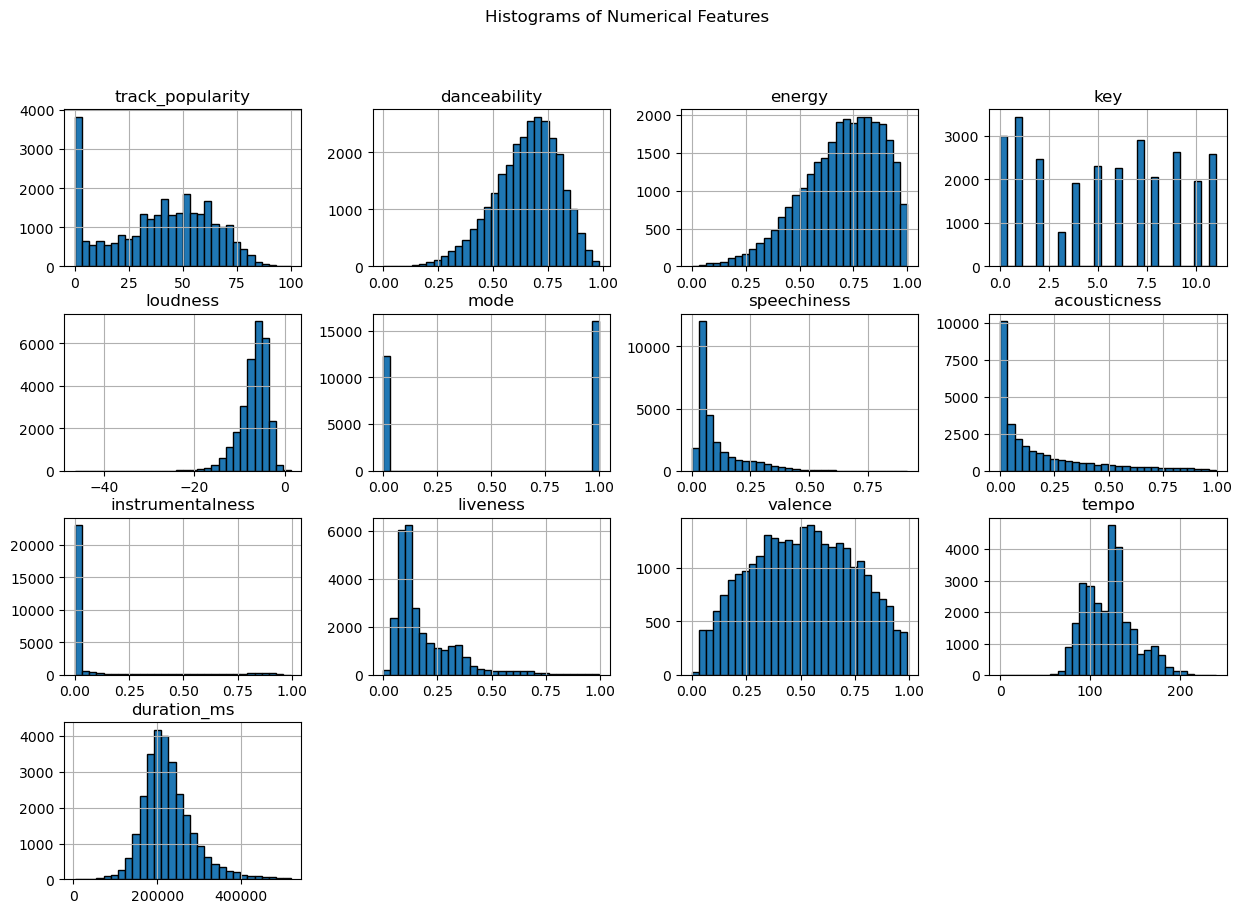

In [12]:
#Data View
#Histogram for numerical attributes
#Histograms for numerical attributes can help us visual the distribution of the dataset, and identify if there is a normal distribution or a skewed distribution.

numerical_features = songs_data.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

#Most of the distribution are skewed.

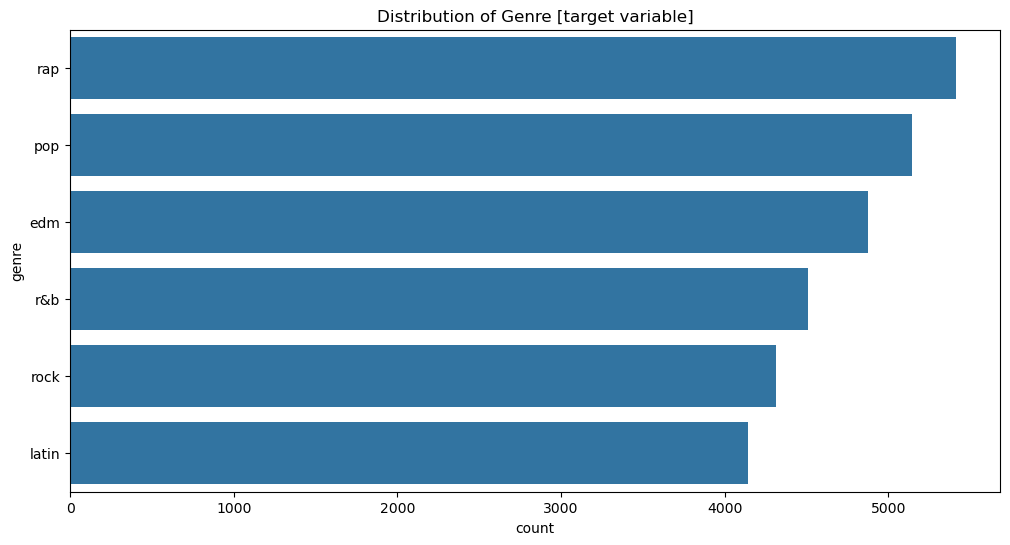

In [13]:
# Distribution of target variable 'genre'
plt.figure(figsize=(12, 6))
sns.countplot(y='genre', data=songs_data, order=songs_data['genre'].value_counts().index)
plt.title('Distribution of Genre [target variable]')
plt.show()

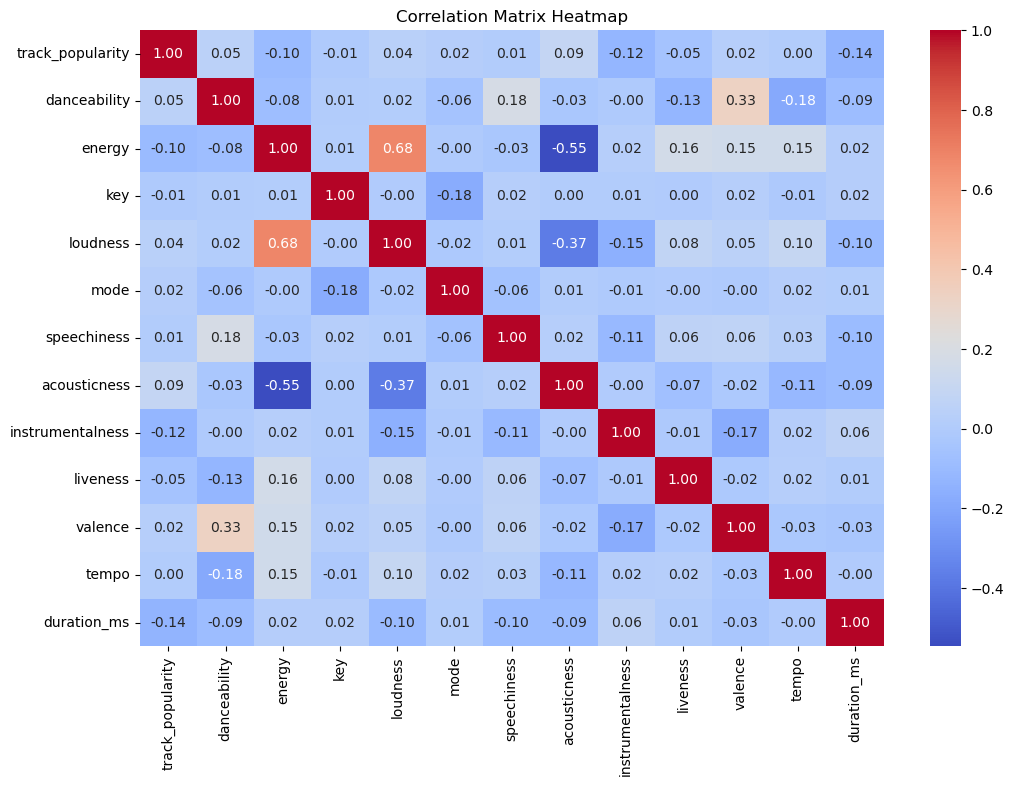

In [14]:
# Correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

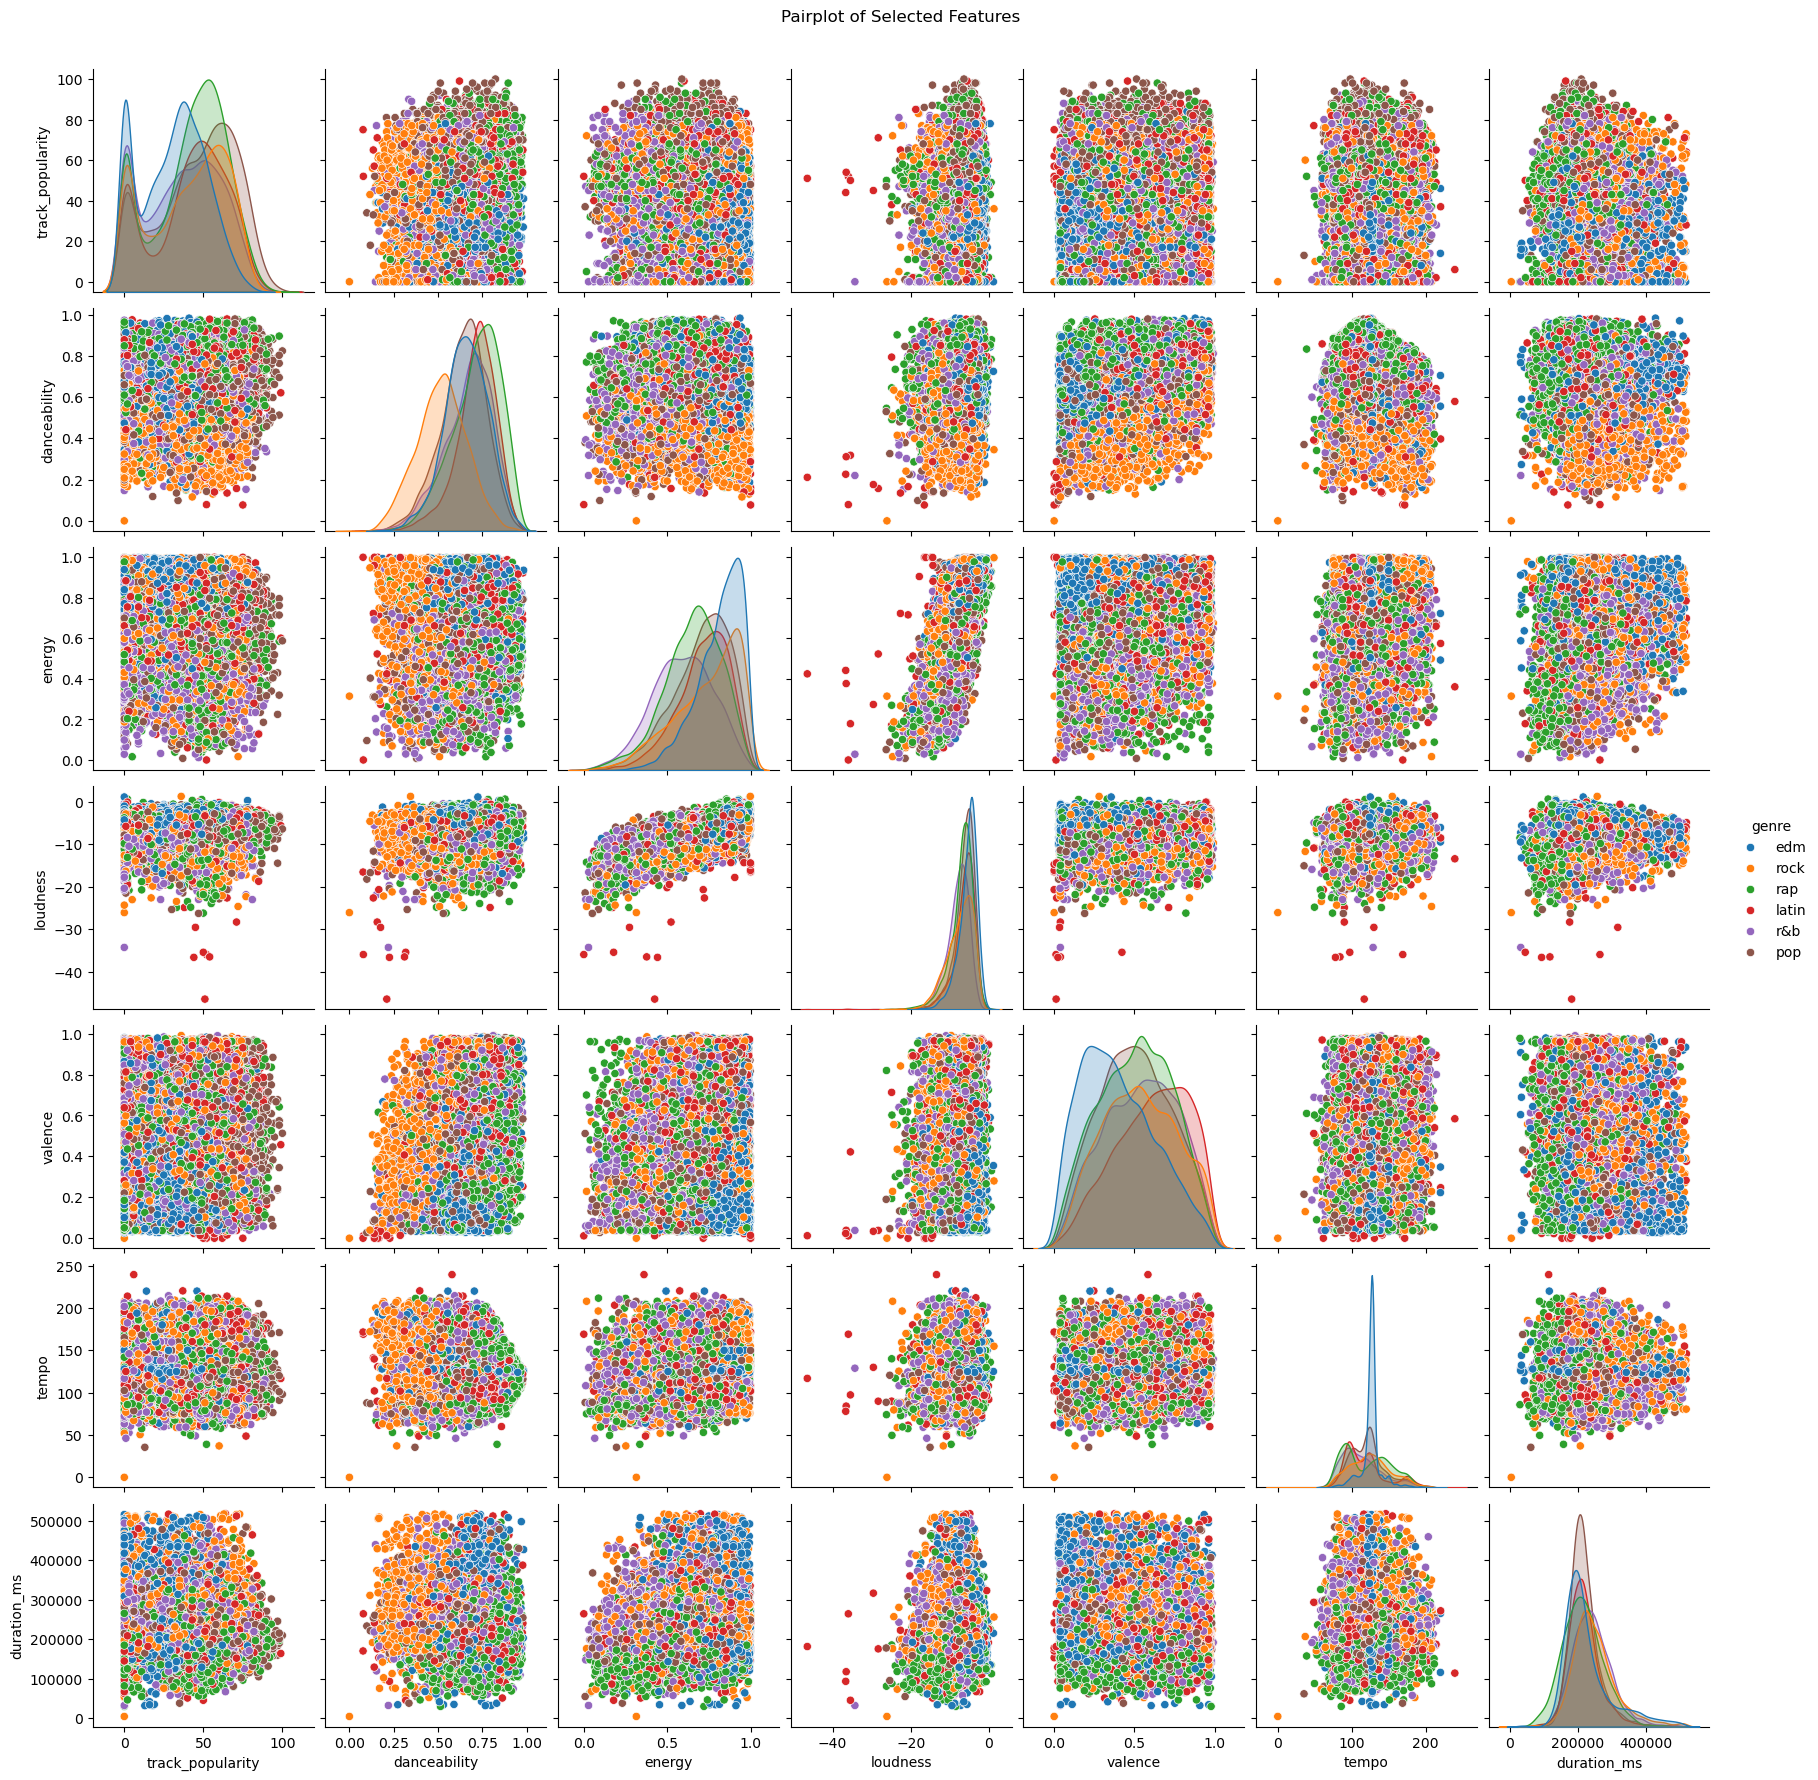

In [15]:
# Pairplot for selected features
selected_features = ['track_popularity', 'danceability', 'energy', 'loudness', 'valence', 'tempo', 'duration_ms']
sns.pairplot(songs_data, vars=selected_features, hue='genre')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

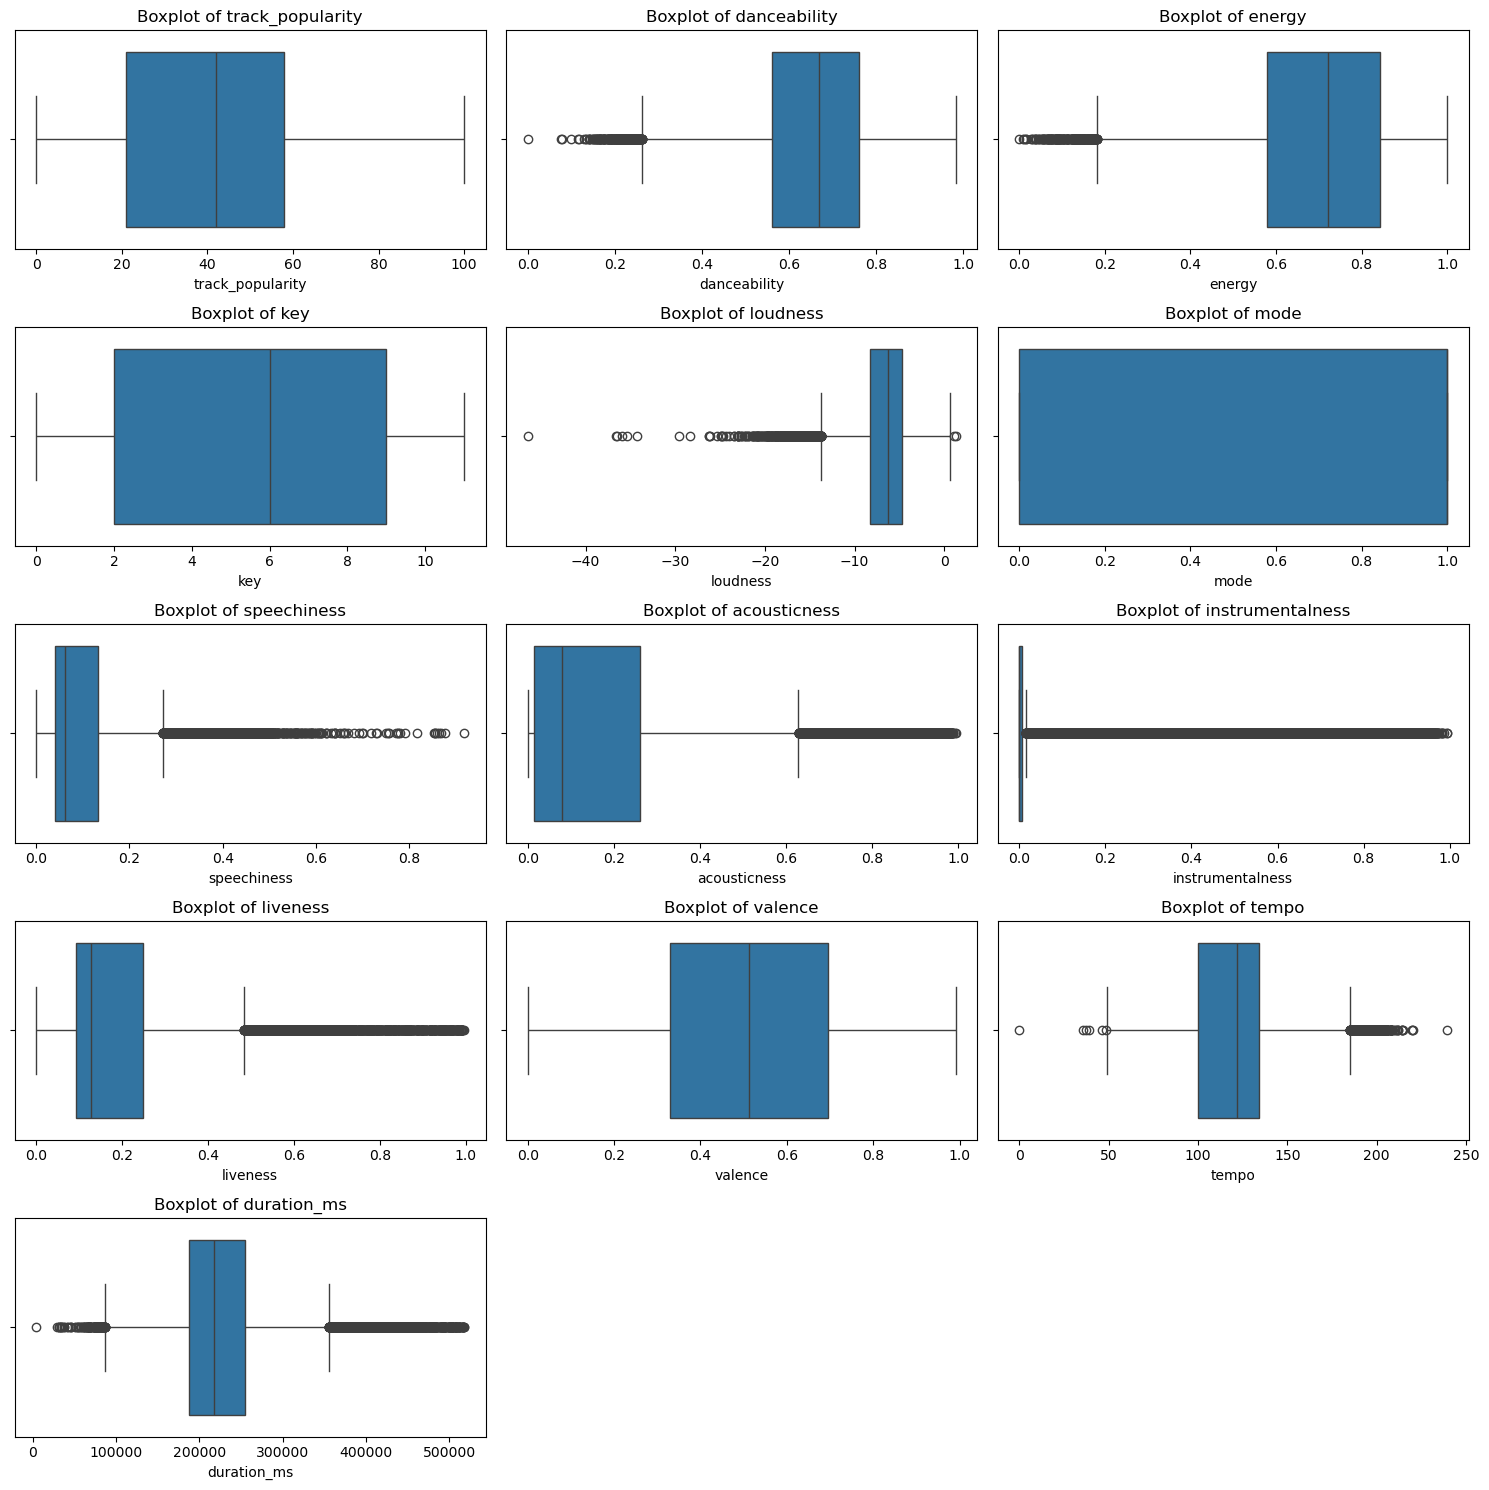

In [16]:
#Boxplot
# Select numeric columns
numeric_columns = songs_data.select_dtypes(include=['float64', 'int64']).columns

# Number of columns to display side by side
num_columns = 3

# Create subplots
fig, axes = plt.subplots(nrows=(len(numeric_columns) + num_columns - 1) // num_columns, ncols=num_columns, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through columns and create boxplots
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=songs_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
# Check for duplicates
print("There are ", songs_data.duplicated().sum(), " duplicate rows in the dataset.")

There are  55  duplicate rows in the dataset.


In [18]:
# Removig duplicates
songs_data = songs_data.drop_duplicates()

# Confirm removal of duplicates
print("There are ", songs_data.duplicated().sum(), " duplicate rows in the dataset.")

There are  0  duplicate rows in the dataset.


In [19]:
# Removing columns that wont be used on the Model Train
songs_data = songs_data.drop(['track_name', 'track_artist'], axis=1)

# Check if the columns are dropped
songs_data.head()

track_popularity genre  danceability  energy  key  \
track_id                                                                    
6ho0GyrWZN3mhi9zVRW7xi                79   edm         0.760   0.964    2   
4bYJKHG6KLdGzHQRJMaFc8                 3  rock         0.581   0.831    1   
1VGlMYqPO1LHyclvfIMvWI                 0   edm         0.661   0.760    8   
6BbINUfGabVyiNFJpQXn3x                62   rap         0.718   0.679   11   
1Ly0ssAgeM7YqdHptao8Oe                15  rock         0.426   0.619    4   

                        loudness  mode  speechiness  acousticness  \
track_id                                                            
6ho0GyrWZN3mhi9zVRW7xi    -5.844     1       0.0576      0.001820   
4bYJKHG6KLdGzHQRJMaFc8    -8.045     1       0.1070      0.045800   
1VGlMYqPO1LHyclvfIMvWI    -4.769     1       0.0268      0.000406   
6BbINUfGabVyiNFJpQXn3x    -5.899     0       0.0706      0.001910   
1Ly0ssAgeM7YqdHptao8Oe   -11.501     0       0.0722      0.000084   

                        instrumentalness  liveness  valence    tempo  \
track_id                                                               
6ho0GyrWZN3mhi9zVRW7xi           0.70000    0.0974    0.641  125.000   
4bYJKHG6KLdGzHQRJMaFc8           0.00000    0.0782    0.885  144.684   
1VGlMYqPO1LHyclvfIMvWI           0.04070    0.6110    0.439   99.993   
6BbINUfGabVyiNFJpQXn3x           0.01040    0.3850    0.205  157.970   
1Ly0ssAgeM7YqdHptao8Oe           0.00239    0.1700    0.382  162.721   

                        duration_ms  
track_id                             
6ho0GyrWZN3mhi9zVRW7xi       248036  
4bYJKHG6KLdGzHQRJMaFc8       168160  
1VGlMYqPO1LHyclvfIMvWI       271238  
6BbINUfGabVyiNFJpQXn3x       173347  
1Ly0ssAgeM7YqdHptao8Oe       168440

In [20]:
#Handling Outliers
#Outliers can skew and mislead the results of the analysis and the performance of the model, whether they are genuine extreme values or errors in the data.

#Analysing the histogram, we concluded that most of the distributions are skewed or doesn't have a significant distribution pattern, imputation might be the most effective approach.

#Imputation with median: Preferred for its robustness to outliers and ability to preserve the data’s distribution.

numeric_columns = songs_data.select_dtypes(include=['float64', 'int64']).columns

# Function to handle outliers with imputation using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)      #Q1 = the lower quartile (25th percentile)
    Q3 = df[column].quantile(0.75)      #Q2 = the upper quartile (75th percentile)
    IQR = Q3 - Q1                       #IQR = the range between Q1 & Q3
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where(df[column] < lower_bound, median, df[column])
    df[column] = np.where(df[column] > upper_bound, median, df[column])

# Loop through each numeric column and apply the handle_outliers_iqr function
for column in numeric_columns:
    handle_outliers_iqr(songs_data, column)

songs_data.describe()

track_popularity  danceability        energy           key  \
count      28341.000000  28341.000000  28341.000000  28341.000000   
mean          39.331428      0.657511      0.703056      5.367842   
std           23.696837      0.139601      0.176177      3.613852   
min            0.000000      0.263000      0.183000      0.000000   
25%           21.000000      0.566000      0.584000      2.000000   
50%           42.000000      0.670000      0.722000      6.000000   
75%           58.000000      0.760000      0.843000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  28341.000000  28341.000000  28341.000000  28341.000000   
mean      -6.527243      0.565471      0.079395      0.130256   
std        2.512387      0.495704      0.056437      0.152400   
min      -13.703000      0.000000      0.000000      0.000000   
25%       -8.002000      0.000000      0.041000      0.014400   
50%       -6.261000      1.000000      0.062600      0.079700   
75%       -4.710000      1.000000      0.093300      0.193000   
max        0.642000      1.000000      0.271000      0.628000   

       instrumentalness      liveness       valence         tempo  \
count      28341.000000  28341.000000  28341.000000  28341.000000   
mean           0.000648      0.160186      0.510407    119.711797   
std            0.002164      0.098516      0.234365     25.058319   
min            0.000000      0.000000      0.000000     48.981000   
25%            0.000000      0.092600      0.329000     99.972000   
50%            0.000021      0.127000      0.512000    121.993000   
75%            0.000045      0.206000      0.695000    131.760000   
max            0.016300      0.483000      0.991000    185.024000   

         duration_ms  
count   28341.000000  
mean   219887.119191  
std     47325.678891  
min     87000.000000  
25%    188240.000000  
50%    216923.000000  
75%    247427.000000  
max    355787.000000

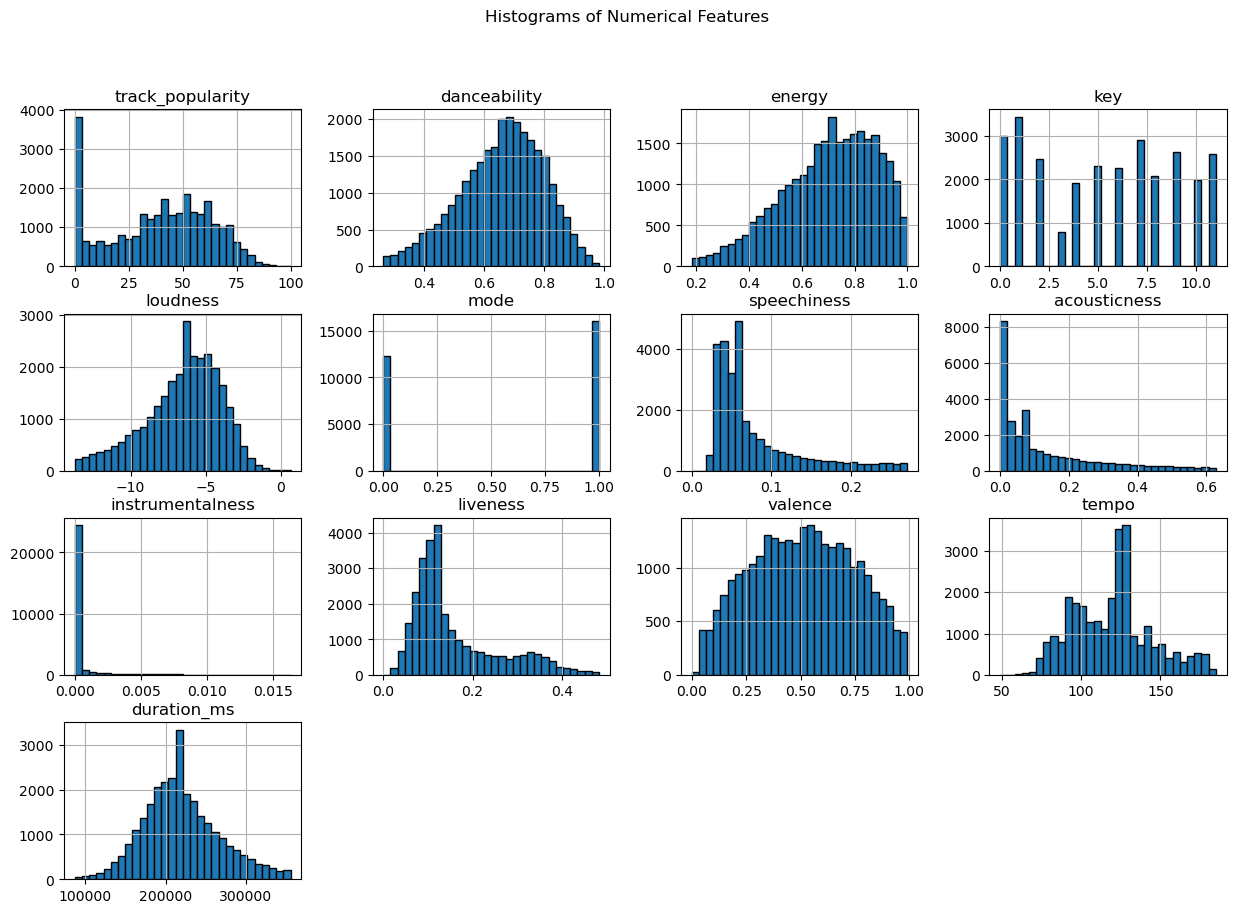

In [21]:
#Feature Engineering
# Histograms for numerical features
numerical_features = songs_data.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [22]:
#Label Encoding for the Target Variable genre

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encoding for 'genre' column
songs_data['genre_encoded'] = label_encoder.fit_transform(songs_data['genre'])
songs_data['genre_encoded'].unique()

# Display the first few rows to check the binning
print(songs_data[['genre', 'genre_encoded']].head())

                       genre  genre_encoded
track_id                                   
6ho0GyrWZN3mhi9zVRW7xi   edm              0
4bYJKHG6KLdGzHQRJMaFc8  rock              5
1VGlMYqPO1LHyclvfIMvWI   edm              0
6BbINUfGabVyiNFJpQXn3x   rap              4
1Ly0ssAgeM7YqdHptao8Oe  rock              5


In [23]:
songs_data.value_counts()

track_popularity  genre  danceability  energy  key   loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    duration_ms  genre_encoded
0.0               edm    0.635         0.868   4.0   -5.688    1.0   0.0570       0.000381      0.000021          0.0606    0.0833   127.962  318755.0     0                2
                         0.636         0.828   7.0   -4.892    1.0   0.0368       0.000396      0.000021          0.0452    0.0464   128.044  284935.0     0                2
                         0.571         0.909   1.0   -6.386    0.0   0.0411       0.000379      0.000021          0.3710    0.2550   127.960  208771.0     0                2
                         0.657         0.911   1.0   -6.109    1.0   0.0631       0.014900      0.000021          0.1100    0.2010   128.011  216923.0     0                2
                         0.267         0.796   2.0   -4.070    1.0   0.0530       0.231000      0.000000          0.0790    0.1060   12

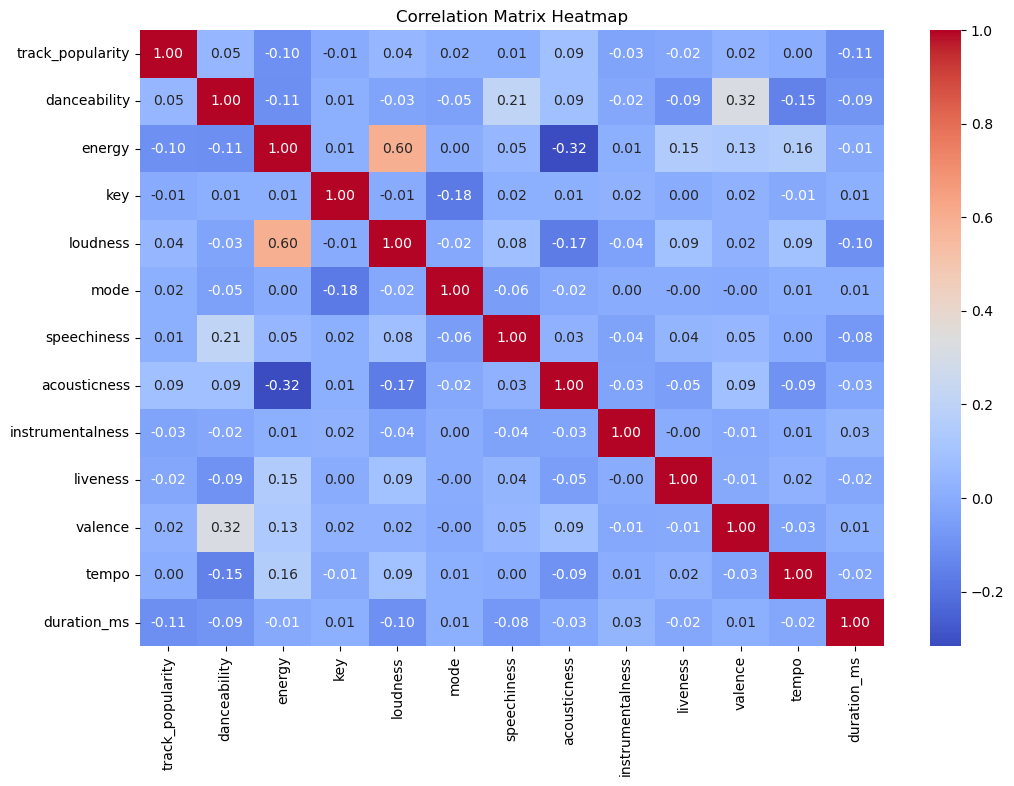

In [24]:
# Correlation matrix
numerical_features = songs_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
#Popularity Normalization
scaler_minmax = MinMaxScaler()
songs_data[['track_popularity_normalized']] = scaler_minmax.fit_transform(songs_data[['track_popularity']])

# Display the first few rows to check the new columns
songs_data[['track_popularity_normalized', 'track_popularity']].head()

track_popularity_normalized  track_popularity
track_id                                                             
6ho0GyrWZN3mhi9zVRW7xi                         0.79              79.0
4bYJKHG6KLdGzHQRJMaFc8                         0.03               3.0
1VGlMYqPO1LHyclvfIMvWI                         0.00               0.0
6BbINUfGabVyiNFJpQXn3x                         0.62              62.0
1Ly0ssAgeM7YqdHptao8Oe                         0.15              15.0

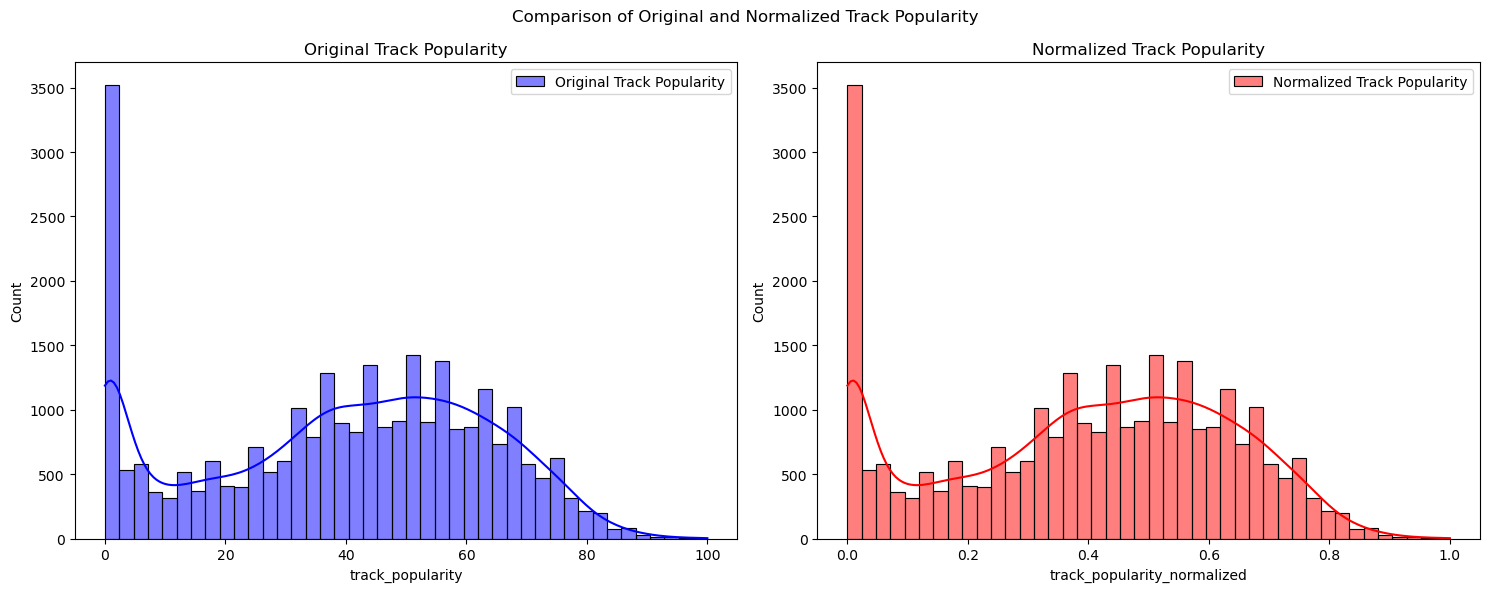

In [26]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Track Popularity
sns.histplot(songs_data['track_popularity'], color='blue', label='Original Track Popularity', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Track Popularity')

# Plotting Normalized Track Popularity
sns.histplot(songs_data['track_popularity_normalized'], color='red', label='Normalized Track Popularity', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Track Popularity')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Track Popularity')

plt.tight_layout()
plt.show()

In [27]:
#Acousticness Normaliztion
scaler_minmax = MinMaxScaler()
songs_data[['acousticness_normalized']] = scaler_minmax.fit_transform(songs_data[['acousticness']])

# Display the first few rows to check the new columns
songs_data[['acousticness_normalized', 'acousticness']].head()

acousticness_normalized  acousticness
track_id                                                     
6ho0GyrWZN3mhi9zVRW7xi                 0.002898      0.001820
4bYJKHG6KLdGzHQRJMaFc8                 0.072930      0.045800
1VGlMYqPO1LHyclvfIMvWI                 0.000646      0.000406
6BbINUfGabVyiNFJpQXn3x                 0.003041      0.001910
1Ly0ssAgeM7YqdHptao8Oe                 0.000134      0.000084

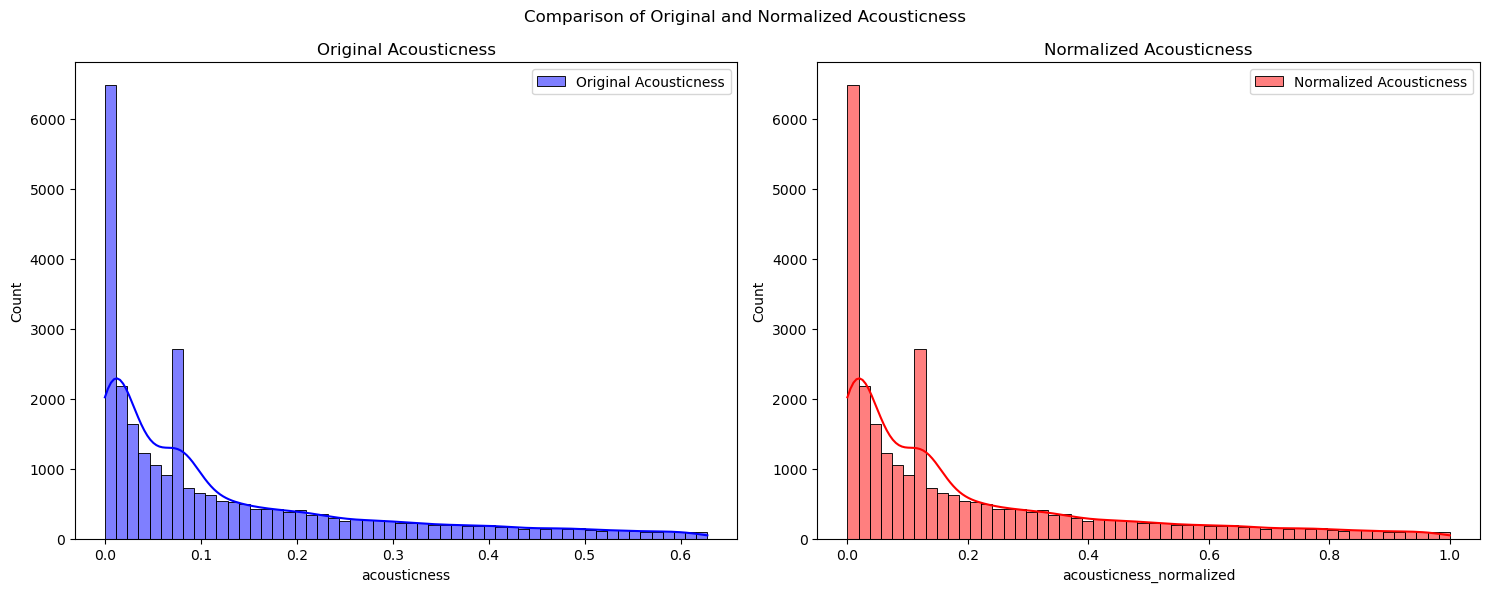

In [28]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Acousticness
sns.histplot(songs_data['acousticness'], color='blue', label='Original Acousticness', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Acousticness')

# Plotting Normalized Acousticness
sns.histplot(songs_data['acousticness_normalized'], color='red', label='Normalized Acousticness', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Acousticness')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Acousticness')

plt.tight_layout()
plt.show()

In [29]:
#Instrumentalness Normalization
scaler_minmax = MinMaxScaler()
songs_data[['instrumentalness_normalized']] = scaler_minmax.fit_transform(songs_data[['instrumentalness']])

# Display the first few rows to check the new columns
songs_data[['instrumentalness_normalized', 'instrumentalness']].head()

instrumentalness_normalized  instrumentalness
track_id                                                             
6ho0GyrWZN3mhi9zVRW7xi                     0.001270          0.000021
4bYJKHG6KLdGzHQRJMaFc8                     0.000000          0.000000
1VGlMYqPO1LHyclvfIMvWI                     0.001270          0.000021
6BbINUfGabVyiNFJpQXn3x                     0.638037          0.010400
1Ly0ssAgeM7YqdHptao8Oe                     0.146626          0.002390

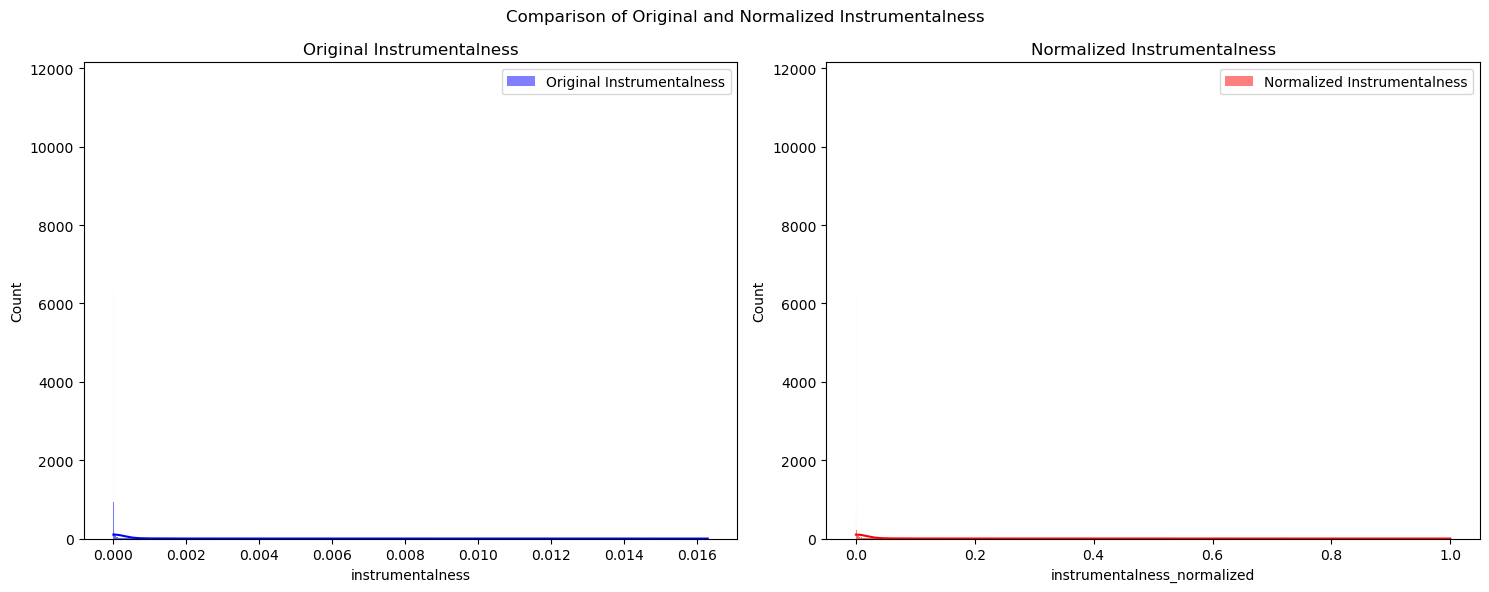

In [30]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Instrumentalness
sns.histplot(songs_data['instrumentalness'], color='blue', label='Original Instrumentalness', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Instrumentalness')

# Plotting Normalized Instrumentalness
sns.histplot(songs_data['instrumentalness_normalized'], color='red', label='Normalized Instrumentalness', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Instrumentalness')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Instrumentalness')

plt.tight_layout()
plt.show()

In [31]:
#Duration Normalization
scaler_minmax = MinMaxScaler()
songs_data[['duration_ms_normalized']] = scaler_minmax.fit_transform(songs_data[['duration_ms']])

# Display the first few rows to check the new columns
songs_data[['duration_ms_normalized', 'duration_ms']].head()

duration_ms_normalized  duration_ms
track_id                                                   
6ho0GyrWZN3mhi9zVRW7xi                0.599121     248036.0
4bYJKHG6KLdGzHQRJMaFc8                0.301949     168160.0
1VGlMYqPO1LHyclvfIMvWI                0.685442     271238.0
6BbINUfGabVyiNFJpQXn3x                0.321247     173347.0
1Ly0ssAgeM7YqdHptao8Oe                0.302991     168440.0

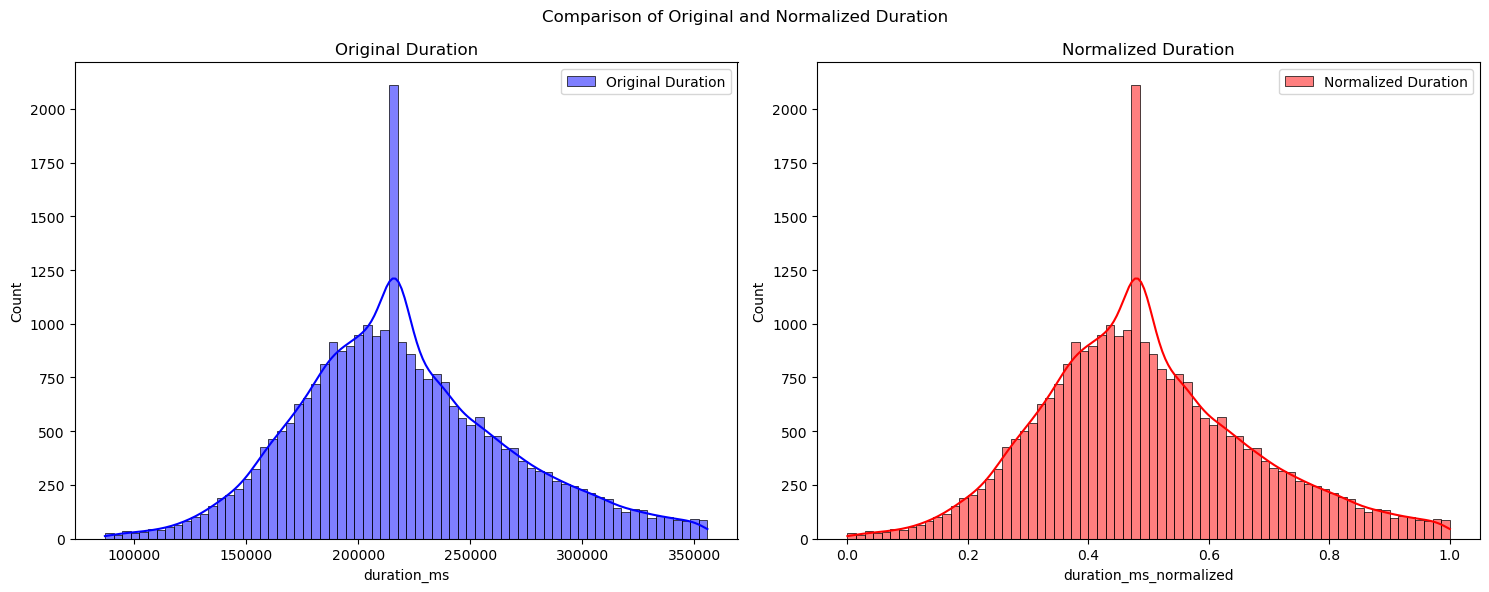

In [32]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Duration
sns.histplot(songs_data['duration_ms'], color='blue', label='Original Duration', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Duration')

# Plotting Normalized Duration
sns.histplot(songs_data['duration_ms_normalized'], color='red', label='Normalized Duration', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Duration')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Duration')

plt.tight_layout()
plt.show()

In [33]:
#Tempo Normaliztion
scaler_minmax = MinMaxScaler()
songs_data['tempo_normalized'] = scaler_minmax.fit_transform(songs_data[['tempo']])

# Display the first few rows to check the new columns
songs_data[['tempo', 'tempo_normalized']].head()

tempo  tempo_normalized
track_id                                         
6ho0GyrWZN3mhi9zVRW7xi  125.000          0.558787
4bYJKHG6KLdGzHQRJMaFc8  144.684          0.703476
1VGlMYqPO1LHyclvfIMvWI   99.993          0.374970
6BbINUfGabVyiNFJpQXn3x  157.970          0.801136
1Ly0ssAgeM7YqdHptao8Oe  162.721          0.836059

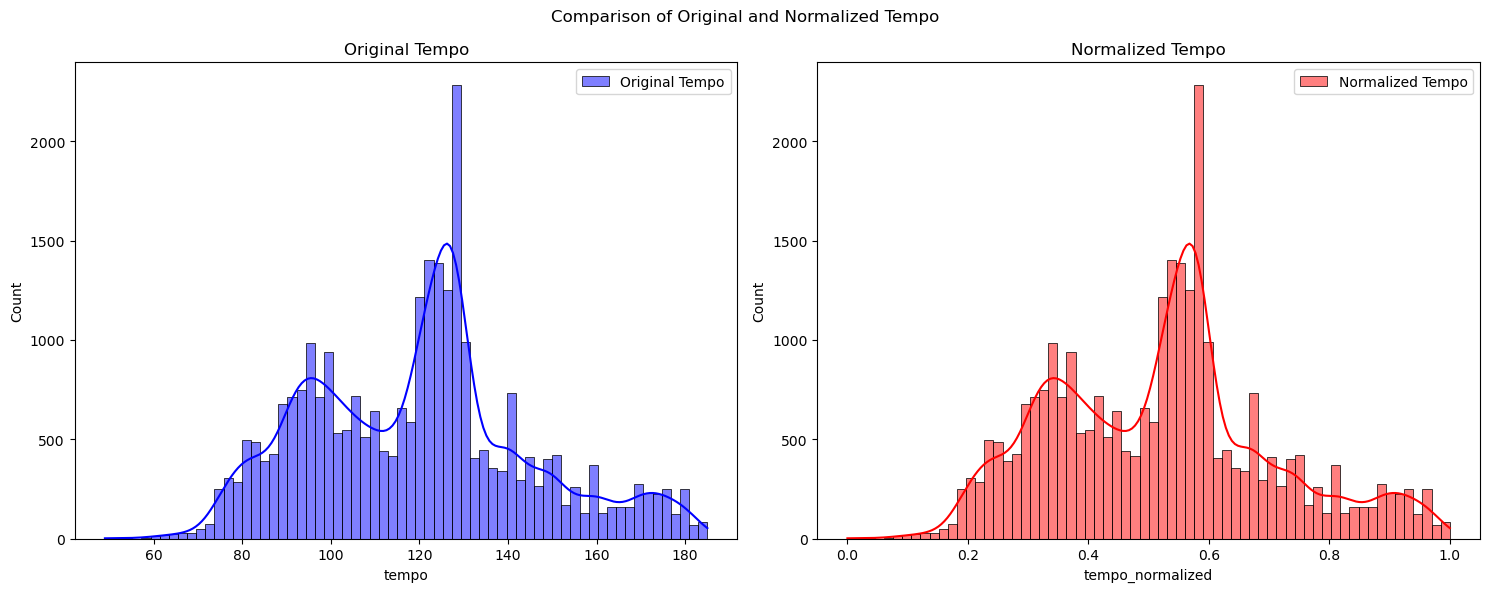

In [34]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Tempo
sns.histplot(songs_data['tempo'], color='blue', label='Original Tempo', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Tempo')

# Plotting Normalized Tempo
sns.histplot(songs_data['tempo_normalized'], color='red', label='Normalized Tempo', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Normalized Tempo')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Normalized Tempo')

plt.tight_layout()
plt.show()

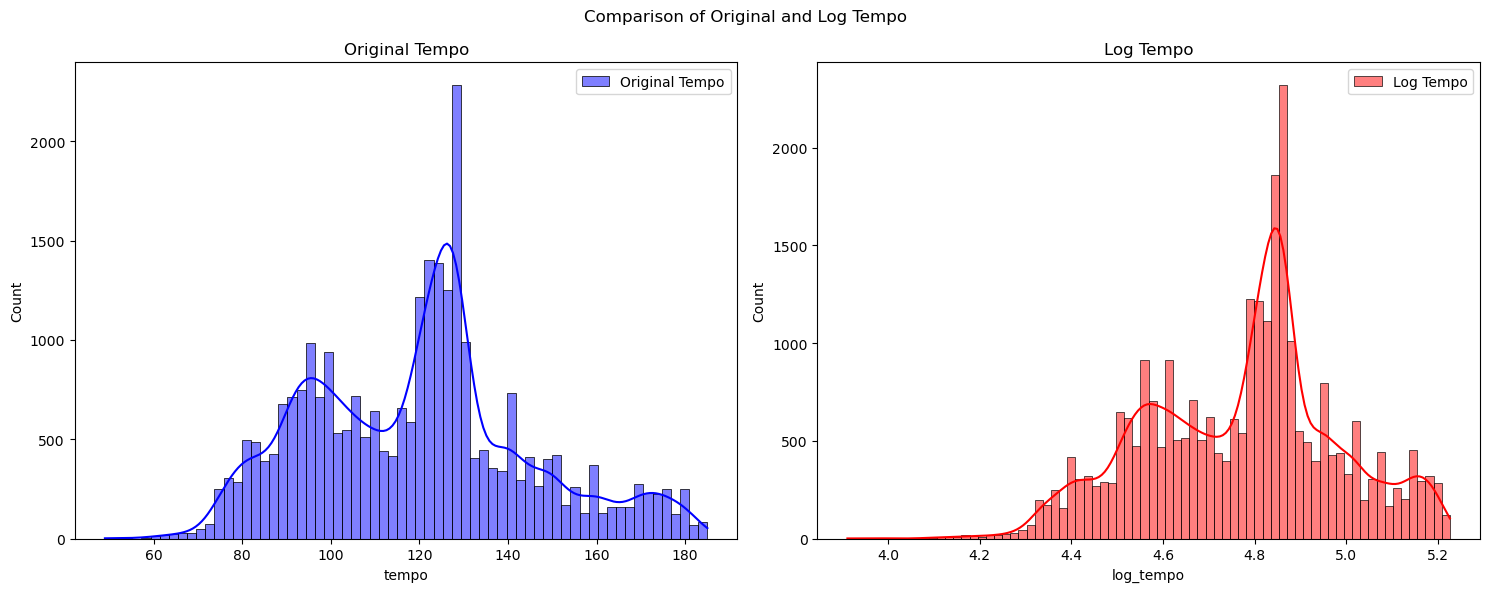

In [35]:
#Log
songs_data['log_tempo'] = np.log1p(songs_data['tempo'])

# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Original Tempo
sns.histplot(songs_data['tempo'], color='blue', label='Original Tempo', kde=True, ax=axs[0], alpha=0.5)
axs[0].legend()
axs[0].set_title('Original Tempo')

# Plotting Log Transformation of Tempo
sns.histplot(songs_data['log_tempo'], color='red', label='Log Tempo', kde=True, ax=axs[1], alpha=0.5)
axs[1].legend()
axs[1].set_title('Log Tempo')

# Adding overall title to the figure
plt.suptitle('Comparison of Original and Log Tempo')

plt.tight_layout()
plt.show()

In [36]:
#Binning Values
# Binning the 'speechiness' feature
bin_labels = ['Music', 'Mixed', 'Speech']

# Define the bin edges based on the given thresholds
bin_edges = [0, 0.33, 0.66, 1.0]

# Bin 'speechiness' using cut with defined edges and labels
songs_data['speechiness_binned'] = pd.cut(songs_data['speechiness'], bins=bin_edges, labels=bin_labels, right=True, include_lowest=True)

#One-Hot encoding to the new column of Speechiness
one_hot_genre = pd.get_dummies(songs_data['speechiness_binned'], prefix='speechiness_binned', drop_first=True, dtype='int')
songs_data = pd.concat([songs_data, one_hot_genre], axis=1)
songs_data = songs_data.drop(['speechiness_binned', 'speechiness'], axis=1)

# Display the first few rows to check the binning
songs_data.head()

track_popularity genre  danceability  energy   key  \
track_id                                                                     
6ho0GyrWZN3mhi9zVRW7xi              79.0   edm         0.760   0.964   2.0   
4bYJKHG6KLdGzHQRJMaFc8               3.0  rock         0.581   0.831   1.0   
1VGlMYqPO1LHyclvfIMvWI               0.0   edm         0.661   0.760   8.0   
6BbINUfGabVyiNFJpQXn3x              62.0   rap         0.718   0.679  11.0   
1Ly0ssAgeM7YqdHptao8Oe              15.0  rock         0.426   0.619   4.0   

                        loudness  mode  acousticness  instrumentalness  \
track_id                                                                 
6ho0GyrWZN3mhi9zVRW7xi    -5.844   1.0      0.001820          0.000021   
4bYJKHG6KLdGzHQRJMaFc8    -8.045   1.0      0.045800          0.000000   
1VGlMYqPO1LHyclvfIMvWI    -4.769   1.0      0.000406          0.000021   
6BbINUfGabVyiNFJpQXn3x    -5.899   0.0      0.001910          0.010400   
1Ly0ssAgeM7YqdHptao8Oe   -11.501   0.0      0.000084          0.002390   

                        liveness  ...  duration_ms  genre_encoded  \
track_id                          ...                               
6ho0GyrWZN3mhi9zVRW7xi    0.0974  ...     248036.0              0   
4bYJKHG6KLdGzHQRJMaFc8    0.0782  ...     168160.0              5   
1VGlMYqPO1LHyclvfIMvWI    0.1270  ...     271238.0              0   
6BbINUfGabVyiNFJpQXn3x    0.3850  ...     173347.0              4   
1Ly0ssAgeM7YqdHptao8Oe    0.1700  ...     168440.0              5   

                        track_popularity_normalized  acousticness_normalized  \
track_id                                                                       
6ho0GyrWZN3mhi9zVRW7xi                         0.79                 0.002898   
4bYJKHG6KLdGzHQRJMaFc8                         0.03                 0.072930   
1VGlMYqPO1LHyclvfIMvWI                         0.00                 0.000646   
6BbINUfGabVyiNFJpQXn3x                         0.62                 0.003041   
1Ly0ssAgeM7YqdHptao8Oe                         0.15                 0.000134   

                        instrumentalness_normalized  duration_ms_normalized  \
track_id                                                                      
6ho0GyrWZN3mhi9zVRW7xi                     0.001270                0.599121   
4bYJKHG6KLdGzHQRJMaFc8                     0.000000                0.301949   
1VGlMYqPO1LHyclvfIMvWI                     0.001270                0.685442   
6BbINUfGabVyiNFJpQXn3x                     0.638037                0.321247   
1Ly0ssAgeM7YqdHptao8Oe                     0.146626                0.302991   

                        tempo_normalized  log_tempo  speechiness_binned_Mixed  \
track_id                                                                        
6ho0GyrWZN3mhi9zVRW7xi          0.558787   4.836282                         0   
4bYJKHG6KLdGzHQRJMaFc8          0.703476   4.981440                         0   
1VGlMYqPO1LHyclvfIMvWI          0.374970   4.615051                         0   
6BbINUfGabVyiNFJpQXn3x          0.801136   5.068716                         0   
1Ly0ssAgeM7YqdHptao8Oe          0.836059   5.098164                         0   

                        speechiness_binned_Speech  
track_id                                           
6ho0GyrWZN3mhi9zVRW7xi                          0  
4bYJKHG6KLdGzHQRJMaFc8                          0  
1VGlMYqPO1LHyclvfIMvWI                          0  
6BbINUfGabVyiNFJpQXn3x                          0  
1Ly0ssAgeM7YqdHptao8Oe                          0  

[5 rows x 22 columns]

In [37]:
# Define a threshold for instrumentalness to determine vocal vs instrumental
instrumental_threshold = 0.5

# Create a new binary feature 'is_instrumental'
songs_data['is_instrumental'] = (songs_data['instrumentalness_normalized'] > instrumental_threshold).astype(int)

# Display the first few rows to check the new feature
print(songs_data[['instrumentalness_normalized', 'is_instrumental']].head())

                        instrumentalness_normalized  is_instrumental
track_id                                                            
6ho0GyrWZN3mhi9zVRW7xi                     0.001270                0
4bYJKHG6KLdGzHQRJMaFc8                     0.000000                0
1VGlMYqPO1LHyclvfIMvWI                     0.001270                0
6BbINUfGabVyiNFJpQXn3x                     0.638037                1
1Ly0ssAgeM7YqdHptao8Oe                     0.146626                0


In [38]:
# Define the threshold for liveness to determine live vs not live
live_threshold = 0.8

# Create a new binary feature 'is_live'
songs_data['is_live'] = (songs_data['liveness'] > live_threshold).astype(int)

# Display the first few rows to check the new feature
print(songs_data[['liveness', 'is_live']].head())

                        liveness  is_live
track_id                                 
6ho0GyrWZN3mhi9zVRW7xi    0.0974        0
4bYJKHG6KLdGzHQRJMaFc8    0.0782        0
1VGlMYqPO1LHyclvfIMvWI    0.1270        0
6BbINUfGabVyiNFJpQXn3x    0.3850        0
1Ly0ssAgeM7YqdHptao8Oe    0.1700        0


In [39]:
# Create new features
songs_data['loudness_energy_interaction'] = songs_data['loudness'] * songs_data['energy']
songs_data['valence_danceability_interaction'] = songs_data['valence'] * songs_data['danceability']

# Display the first few rows to check the new features
songs_data[['loudness_energy_interaction', 'valence_danceability_interaction']].head()

loudness_energy_interaction  \
track_id                                              
6ho0GyrWZN3mhi9zVRW7xi                    -5.633616   
4bYJKHG6KLdGzHQRJMaFc8                    -6.685395   
1VGlMYqPO1LHyclvfIMvWI                    -3.624440   
6BbINUfGabVyiNFJpQXn3x                    -4.005421   
1Ly0ssAgeM7YqdHptao8Oe                    -7.119119   

                        valence_danceability_interaction  
track_id                                                  
6ho0GyrWZN3mhi9zVRW7xi                          0.487160  
4bYJKHG6KLdGzHQRJMaFc8                          0.514185  
1VGlMYqPO1LHyclvfIMvWI                          0.290179  
6BbINUfGabVyiNFJpQXn3x                          0.147190  
1Ly0ssAgeM7YqdHptao8Oe                          0.162732

In [40]:
#Columns Drop
# Removing genre column, since we already have a encoded one
songs_data = songs_data.drop('genre', axis=1)

# Removing track_popularity column
songs_data = songs_data.drop('track_popularity', axis=1)

# Removing acousticness column
songs_data = songs_data.drop('acousticness', axis=1)

# Removing instrumentalness column
songs_data = songs_data.drop('instrumentalness', axis=1)

# Removing duration_ms column
songs_data = songs_data.drop('duration_ms', axis=1)

# Removing tempo column
songs_data = songs_data.drop('tempo', axis=1)

# Removing liveness column
songs_data = songs_data.drop('liveness', axis=1)

# Removing log_tempo column
songs_data = songs_data.drop('log_tempo', axis=1)
"""
#Removing danceability  column
songs_data = songs_data.drop('danceability', axis=1)

# Removing valence  column
songs_data = songs_data.drop('valence', axis=1)

# Removing loudness column
songs_data = songs_data.drop('loudness', axis=1)

# Removing energy column
songs_data = songs_data.drop('energy', axis=1)

# Removing is_live column
songs_data = songs_data.drop('is_live', axis=1)
"""

"\n#Removing danceability  column\nsongs_data = songs_data.drop('danceability', axis=1)\n\n# Removing valence  column\nsongs_data = songs_data.drop('valence', axis=1)\n\n# Removing loudness column\nsongs_data = songs_data.drop('loudness', axis=1)\n\n# Removing energy column\nsongs_data = songs_data.drop('energy', axis=1)\n\n# Removing is_live column\nsongs_data = songs_data.drop('is_live', axis=1)\n"

In [41]:
#Model Training
X = songs_data.drop(['genre_encoded'], axis=1)
y = songs_data['genre_encoded']

# Encode the target variable
y = pd.factorize(y)[0]

# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rs_rf = RandomForestClassifier()
# Models to be tested
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Function to evaluate models
def evaluate_models(models, X_train, y_train):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_scores[name] = accuracy_score(y_test, y_pred)
        print(f"{name} Classification Report:")
        print(classification_report(y_test, y_pred))
    return model_scores

# Evaluate the models
scores = evaluate_models(models, X_train, y_train)
print("Model scores:", scores)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.55       956
           1       0.48      0.55      0.51       855
           2       0.41      0.41      0.41      1129
           3       0.36      0.27      0.31       815
           4       0.38      0.42      0.40       893
           5       0.34      0.26      0.29      1021

    accuracy                           0.42      5669
   macro avg       0.41      0.42      0.41      5669
weighted avg       0.41      0.42      0.41      5669

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.67      0.56       956
           1       0.50      0.50      0.50       855
           2       0.44      0.44      0.44      1129
           3       0.31      0.32      0.32       815
           4       0.38      0.34      0.36       893
           5       0.34      0.23      0.28      1021

    acc

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:14:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       956
           1       0.64      0.67      0.65       855
           2       0.59      0.60      0.59      1129
           3       0.43      0.38      0.41       815
           4       0.44      0.47      0.45       893
           5       0.42      0.42      0.42      1021

    accuracy                           0.54      5669
   macro avg       0.54      0.54      0.54      5669
weighted avg       0.54      0.54      0.54      5669

Model scores: {'Logistic Regression': 0.4201799259128594, 'KNN': 0.4170047627447522, 'Random Forest': 0.5348385958722879, 'Gradient Boosting': 0.5269006879520197, 'SVM': 0.4993826071617569, 'XGBoost': 0.5424237078849885}


In [42]:
'''
# Hiperparâmetros para RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10,1000,50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)}

np.random.seed(42)

#Configurando hiperparâmetros para RadomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True
)

rs_rf.fit(X_train, y_train);

rs_rf.best_params_

rs_rf.score(X_test, y_test)
'''

"\n# Hiperparâmetros para RandomForestClassifier\nrf_grid = {\n    'n_estimators': np.arange(10,1000,50),\n    'max_depth': [None, 3, 5, 10],\n    'min_samples_split': np.arange(2, 20, 2),\n    'min_samples_leaf': np.arange(1, 20, 2)}\n\nnp.random.seed(42)\n\n#Configurando hiperparâmetros para RadomForestClassifier\nrs_rf = RandomizedSearchCV(RandomForestClassifier(),\n                           param_distributions=rf_grid,\n                           cv=5,\n                           n_iter=20,\n                           verbose=True\n)\n\nrs_rf.fit(X_train, y_train);\n\nrs_rf.best_params_\n\nrs_rf.score(X_test, y_test)\n"

[[691  30  57  48  28 102]
 [ 44 549  46  21 106  89]
 [ 57  44 707  88 120 113]
 [ 68  40 142 314  99 152]
 [ 21  76 182  77 423 114]
 [133 139 104  99 151 395]]


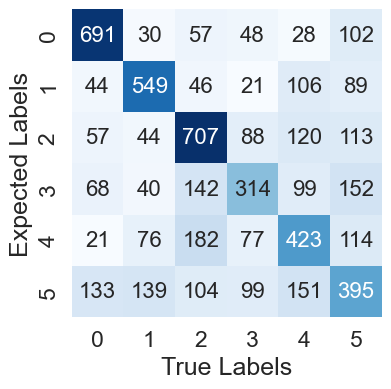

In [47]:
#Model Evaluation
#In this plot we can see were our plot is having the biggest errors and where it is beeing more accertive
rs_rf.fit(X_train, y_train);
y_preds = rs_rf.predict(X_test)

print(confusion_matrix(y_test, y_preds))
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(4,4))
  cm = confusion_matrix(y_test, y_preds)
  ax = sns.heatmap(cm,
                     annot=True,  # Add annotations
                     fmt='d',  # Format of numbers
                     cmap='Blues',  # Color palette
                     cbar=False,  # emove the color bar
                     annot_kws={"size": 16})
  plt.xlabel('True Labels')
  plt.ylabel('Expected Labels')

plot_conf_mat(y_test, y_preds)

In [67]:
clf = LogisticRegression()
clf.fit(X_train, y_train);

clf.coef_

array([[ 1.84530209e-01,  1.02035855e+00, -1.08213969e-02,
        -3.32638914e-01, -1.16071920e-01, -1.54832747e+00,
        -3.58229051e-01, -3.07925546e-01, -1.37502052e-02,
        -3.04093085e-01,  2.47505632e-01,  0.00000000e+00,
         0.00000000e+00,  1.93989095e-02,  0.00000000e+00,
         3.63857568e-01,  9.38373059e-01],
       [-1.16643499e+00,  7.99116441e-01,  5.51327637e-04,
        -1.05006133e+00,  2.48711191e-01,  5.57050040e-01,
         1.54714157e-01, -3.86815409e-02,  2.59029310e-01,
         3.15704638e-01, -4.53720361e-02,  0.00000000e+00,
         0.00000000e+00, -1.32419692e-01,  0.00000000e+00,
         4.80472145e-01, -5.50576305e-02],
       [ 6.34821979e-01, -3.60653574e-01,  1.38024867e-02,
         2.32684317e-01, -8.98773178e-02, -2.11215231e-02,
         1.85225135e-02,  6.01384764e-02, -2.96853149e-01,
        -1.25889229e-01,  9.13940352e-02,  0.00000000e+00,
         0.00000000e+00,  1.68228595e-01,  0.00000000e+00,
        -8.27985257e-02, -2.0

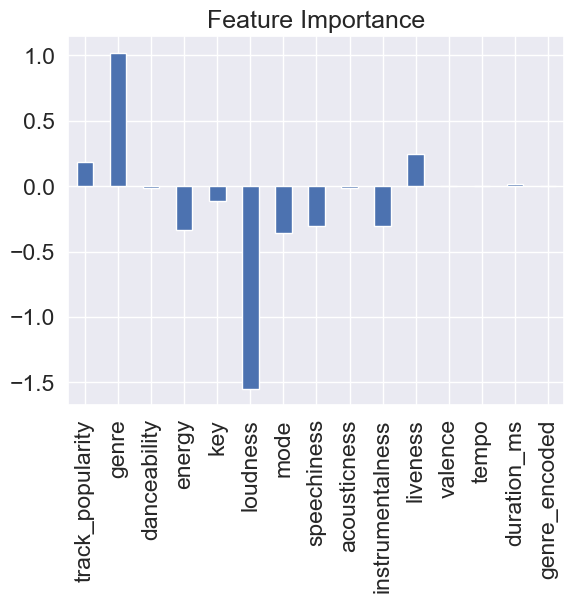

In [69]:
features_dict = dict(zip(songs_data.columns, list(clf.coef_[0])))
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False);